In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('Project_Idea_5.csv')
data.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.drop(labels = 'CustomerID' , axis = 1 , inplace = True)

In [6]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

# Exploratory Data Analysis

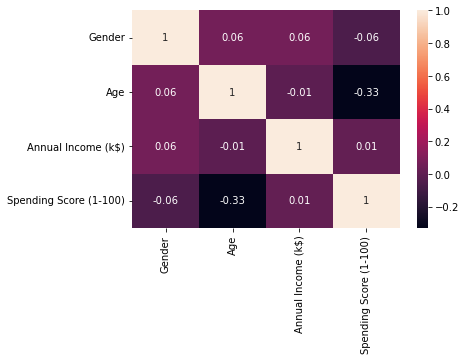

In [8]:
cor = data.corr().round(2)
sns.heatmap(data=cor,annot=True)
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

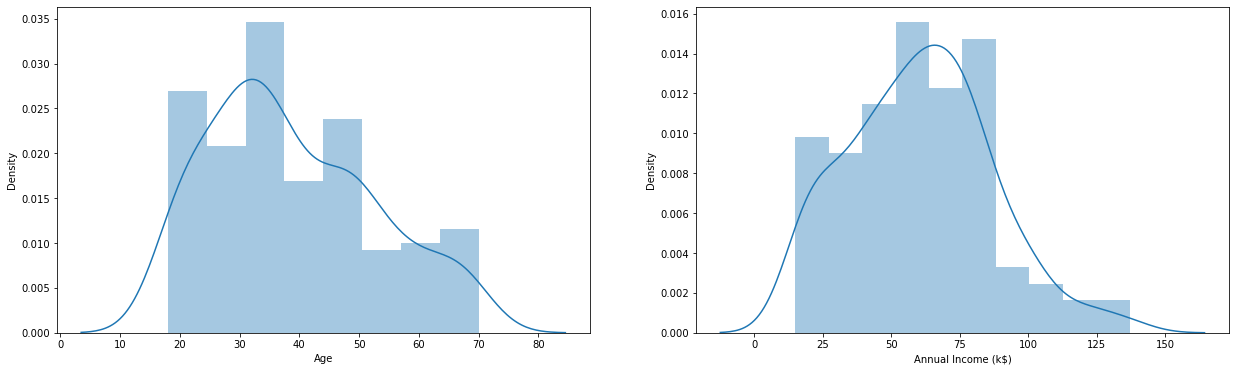

In [9]:
ig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(data['Age'], ax=axes[0])
sns.distplot(data['Annual Income (k$)'], ax=axes[1])

<AxesSubplot:xlabel='Gender', ylabel='count'>

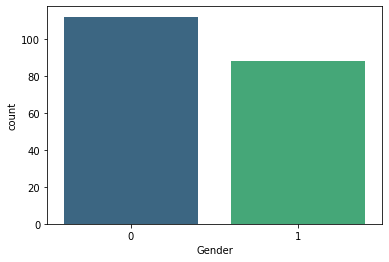

In [10]:
sns.countplot(x='Gender', data=data, palette='viridis')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

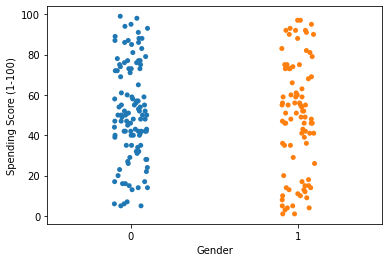

In [11]:
sns.stripplot(x='Gender', y = 'Spending Score (1-100)', data = data)

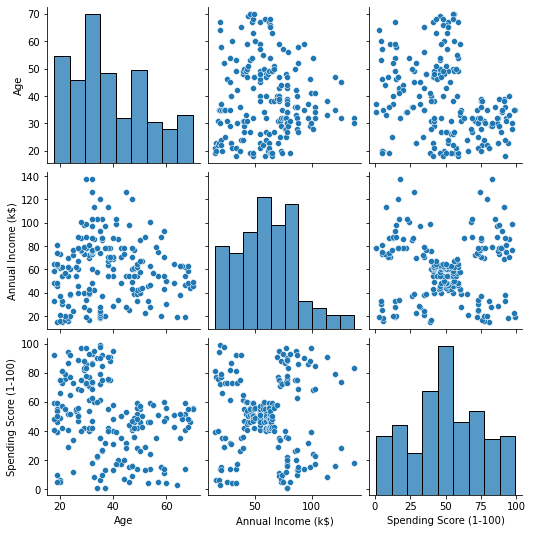

In [12]:
# Comparing pairwise correlations between variables
sns.pairplot(data[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

<Figure size 10x10 with 0 Axes>

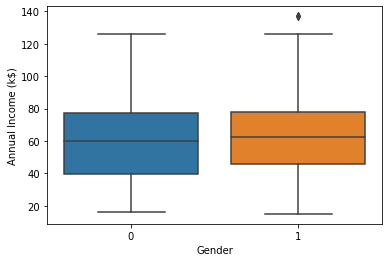

<Figure size 10x10 with 0 Axes>

In [13]:
sns.boxplot( x= 'Gender', y = 'Annual Income (k$)', data = data )
plt.figure(figsize=(10,10), dpi=1)

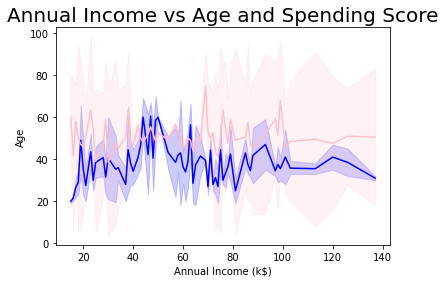

In [14]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

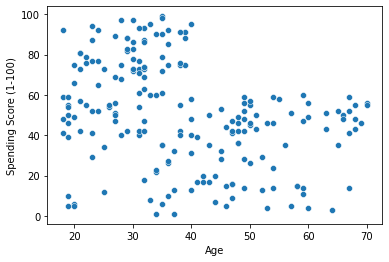

In [15]:
sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)")

In [16]:
data['Age Groups'] = pd.qcut(data['Age'], 3)
print(data.head(20))

    Gender  Age  Annual Income (k$)  Spending Score (1-100)      Age Groups
0        1   19                  15                      39  (17.999, 31.0]
1        1   21                  15                      81  (17.999, 31.0]
2        0   20                  16                       6  (17.999, 31.0]
3        0   23                  16                      77  (17.999, 31.0]
4        0   31                  17                      40  (17.999, 31.0]
5        0   22                  17                      76  (17.999, 31.0]
6        0   35                  18                       6    (31.0, 45.0]
7        0   23                  18                      94  (17.999, 31.0]
8        1   64                  19                       3    (45.0, 70.0]
9        0   30                  19                      72  (17.999, 31.0]
10       1   67                  19                      14    (45.0, 70.0]
11       0   35                  19                      99    (31.0, 45.0]
12       0  

In [17]:
data['Age Groups'] = pd.factorize(data['Age Groups'])[0]

# Liner Regression Model

In [18]:
X=data.drop(['Spending Score (1-100)','Annual Income (k$)','Gender'], axis=1)
y=data['Spending Score (1-100)']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print(regressor.intercept_)

58.13936261616125


In [22]:
print(regressor.coef_)

[ 0.02862777 -9.96931736]


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
18,29,39.689372
170,13,49.315156
107,46,39.746627
98,42,39.574861
177,69,58.912312
182,15,39.517605
5,76,58.769173
146,36,39.574861
12,15,39.861138
152,20,49.429667


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.631752826541383
Mean Squared Error: 538.62390182984
Root Mean Squared Error: 23.208272271538007


# Desion Tree Model

In [26]:
X = data.drop('Spending Score (1-100)', axis=1)
y = data['Spending Score (1-100)']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
18,29,4.0
170,13,95.0
107,46,60.0
98,42,49.0
177,69,75.0
182,15,13.0
5,76,79.0
146,36,35.0
12,15,14.0
152,20,35.0


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.625
Mean Squared Error: 597.575
Root Mean Squared Error: 24.445347205552228


# Logestic Regression

In [32]:
x=data.drop(['Gender'], axis=1)
y=data['Gender']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
lr.score(x_train,y_train)

0.60625

In [38]:
prediction = lr.predict(x_test) 

In [39]:
pre=lr.predict(np.array(['70','10','20',7]).reshape(1,-1))
print(pre)

[0]


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.325
Mean Squared Error: 2989.275
Root Mean Squared Error: 54.67426268364302


# Naive Bayes Model

In [41]:
x=data.drop(['Gender'], axis=1)
y=data['Gender']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [45]:
y_pred  =  classifier.predict(X_test)

In [46]:
pre=lr.predict(np.array(['70','10','20','7']).reshape(1,-1))
print(pre)

[0]


In [47]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


# Neural Network Model

In [49]:
import tensorflow as tf

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=data.drop(['Spending Score (1-100)','Annual Income (k$)'], axis=1)
y = data['Spending Score (1-100)']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 66)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test= scaler.transform(x_test)

In [54]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])


In [55]:
history=model.fit(x_scaled_train,y_train,epochs=100, batch_size=10, validation_data=(x_scaled_test,y_test))

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 3284.2539 - mean_absolute_error: 51.3473 - mean_squared_error: 3284.2539 - val_loss: 2620.3081 - val_mean_absolute_error: 43.6308 - val_mean_squared_error: 2620.3081
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 3162.4070 - mean_absolute_error: 49.9958 - mean_squared_error: 3162.4070 - val_loss: 2447.1685 - val_mean_absolute_error: 41.7375 - val_mean_squared_error: 2447.1685
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 2859.3472 - mean_absolute_error: 46.8155 - mean_squared_error: 2859.3472 - val_loss: 2034.6731 - val_mean_absolute_error: 37.7952 - val_mean_squared_error: 2034.6731
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 2204.3669 - mean_absolute_error: 40.1605 - mean_squared_error: 2204.3669 - val_loss: 1322.5103 - val_mean_absolute_error: 30.5229 - val_mean_squared_error: 1322.5103
Epoch 5/100
16/16 [========================

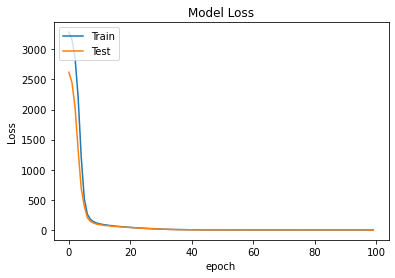

In [56]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')

In [57]:
test_predictions=model.predict(x_scaled_test)
model.evaluate(x_scaled_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2441 - mean_absolute_error: 0.3602 - mean_squared_error: 0.2441


[0.24412159621715546, 0.36023539304733276, 0.24412159621715546]

In [58]:
from sklearn.linear_model import LinearRegression
model_multi=LinearRegression().fit(x_scaled_train,y_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linear_test_prediction=model_multi.predict((x_scaled_test))
#MSE
print(mean_squared_error(linear_test_prediction, y_test))
#MAE
print(mean_absolute_error(linear_test_prediction, y_test))
#RMSE
print(np.sqrt(((linear_test_prediction-y_test)**2).mean()))



2.603240987229339e-28
1.2523315717771765e-14
1.6134562241441008e-14


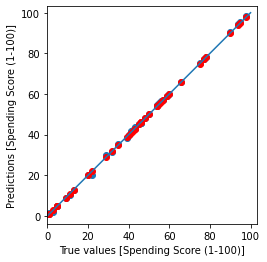

In [59]:
plt.scatter(y_test, test_predictions)
plt.scatter(y_test,linear_test_prediction,c='r')
plt.xlabel('True values [Spending Score (1-100)]')
plt.ylabel('Predictions [Spending Score (1-100)]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.xlim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
